<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning-UAS/blob/main/Chapter_7_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan

In [1]:
# Cek versi Python dan Scikit-Learn
import sys
import sklearn
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# Import pustaka umum
import numpy as np
import matplotlib.pyplot as plt
import os

# Stabilkan output dan pengaturan grafik
np.random.seed(42)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Direktori penyimpanan gambar
IMAGES_PATH = os.path.join(".", "images", "ensembles")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{fig_extension}")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Voting Classifiers

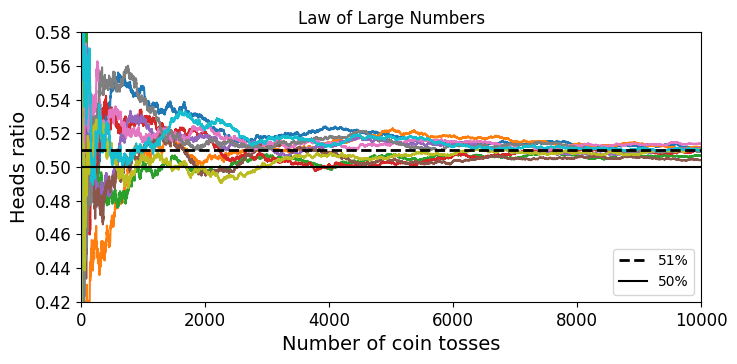

Hard Voting:
LogisticRegression: 0.864
RandomForestClassifier: 0.896
SVC: 0.896
VotingClassifier: 0.912

Soft Voting:
LogisticRegression: 0.864
RandomForestClassifier: 0.896
SVC: 0.896
VotingClassifier: 0.920


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Visualisasi Hukum Bilangan Besar
np.random.seed(42)
proba_heads = 0.51
coin_tosses = (np.random.rand(10000, 10) < proba_heads).astype(np.int32)
cum_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8,3.5))
plt.plot(cum_heads_ratio)
plt.axhline(0.51, linestyle="--", color='k', linewidth=2, label="51%")
plt.axhline(0.5, linestyle="-", color='k', label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.title("Law of Large Numbers")
plt.show()

# Dataset dan Split
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Voting Classifier - Hard Voting
clf1 = LogisticRegression(solver="lbfgs", random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = SVC(gamma="scale", random_state=42)

voting_hard = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
voting_hard.fit(X_train, y_train)

print("Hard Voting:")
for clf in (clf1, clf2, clf3, voting_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: {accuracy_score(y_test, y_pred):.3f}")

# Voting Classifier - Soft Voting
clf1 = LogisticRegression(solver="lbfgs", random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = SVC(gamma="scale", probability=True, random_state=42)

voting_soft = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='soft')
voting_soft.fit(X_train, y_train)

print("\nSoft Voting:")
for clf in (clf1, clf2, clf3, voting_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: {accuracy_score(y_test, y_pred):.3f}")

# **Bagging dan Pasting**

## Bagging dan Pasting pada Scikit-Learn

Decision Tree: 0.856
Bagging Tree : 0.904


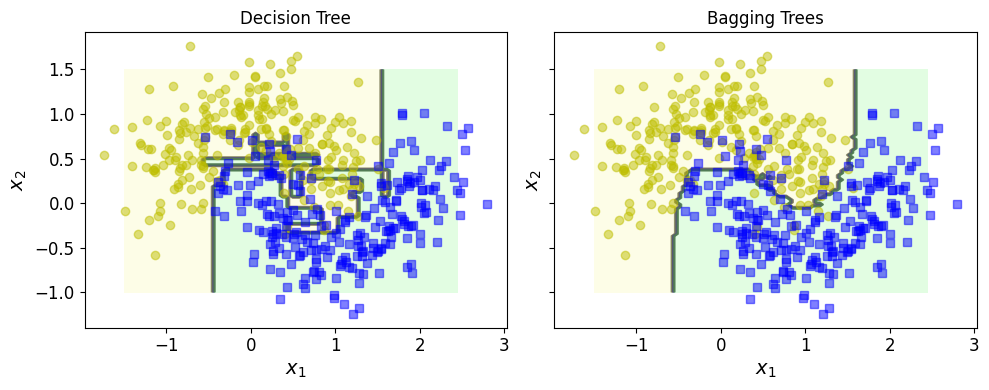

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Bagging & Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

tree_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)

# Evaluasi akurasi
print("Decision Tree:", accuracy_score(y_test, tree_clf.predict(X_test)))
print("Bagging Tree :", accuracy_score(y_test, bag_clf.predict(X_test)))

# Fungsi visualisasi decision boundary
def plot_boundary(clf, title, X, y, ax):
    x1s = np.linspace(-1.5, 2.45, 100)
    x2s = np.linspace(-1, 1.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    cmap_light = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    cmap_dark = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    ax.contourf(x1, x2, y_pred, cmap=cmap_light, alpha=0.3)
    ax.contour(x1, x2, y_pred, cmap=cmap_dark, alpha=0.7)
    ax.plot(X[y==0][:, 0], X[y==0][:, 1], "yo", alpha=0.5)
    ax.plot(X[y==1][:, 0], X[y==1][:, 1], "bs", alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

# Plot keduanya
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
plot_boundary(tree_clf, "Decision Tree", X, y, axes[0])
plot_boundary(bag_clf, "Bagging Trees", X, y, axes[1])
plt.tight_layout()
plt.show()

## Evaluasi Out-of-Bag

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model dengan OOB Score
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    bootstrap=True, oob_score=True, random_state=40)

# Training dan evaluasi
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print("OOB Decision Prob (first 5 rows):")
print(bag_clf.oob_decision_function_[:5])

# Output singkat
print(f"OOB Score     : {bag_clf.oob_score_:.3f}")
print(f"Test Accuracy : {accuracy_score(y_test, y_pred):.3f}")

OOB Decision Prob (first 5 rows):
[[0.275      0.725     ]
 [0.29166667 0.70833333]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]]
OOB Score     : 0.893
Test Accuracy : 0.880


## Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Random Forest dengan 500 pohon dan pembatasan jumlah daun
rf_clf = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=16, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Bagging Classifier dengan DecisionTree yang setara
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

# Evaluasi akurasi
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_bag = accuracy_score(y_test, y_pred_bag)
similarity = np.mean(y_pred_rf == y_pred_bag)

# Output
print(f"Random Forest Accuracy : {acc_rf:.3f}")
print(f"Bagging Accuracy       : {acc_bag:.3f}")
print(f"Prediction Similarity  : {similarity:.3f}")

Random Forest Accuracy : 0.912
Bagging Accuracy       : 0.912
Prediction Similarity  : 1.000


## Feature Importance

sepal length (cm)   : 0.1125
sepal width (cm)    : 0.0231
petal length (cm)   : 0.4410
petal width (cm)    : 0.4234


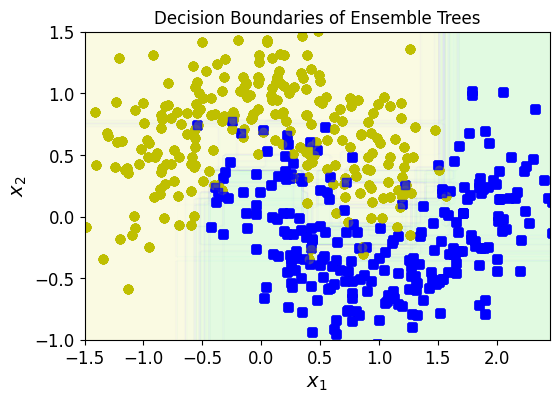

In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load data & model training
iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rf_clf.fit(iris.data, iris.target)

# Tampilkan feature importance
for name, score in zip(iris.feature_names, rf_clf.feature_importances_):
    print(f"{name:20s}: {score:.4f}")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Fungsi visualisasi decision boundary
def plot_decision_boundary(clf, X, y, axes, alpha=1.0, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_grid).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=alpha)
    if contour:
        plt.contour(x1, x2, y_pred, cmap=custom_cmap, linewidths=0.5)

    plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], "yo", alpha=0.6)
    plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], "bs", alpha=0.6)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

# Plot ensemble dari 15 pohon
plt.figure(figsize=(6, 4))
for i in range(15):
    tree = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices = np.random.randint(0, len(X_train), len(X_train))
    tree.fit(X_train[indices], y_train[indices])
    plot_decision_boundary(tree, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)

plt.title("Decision Boundaries of Ensemble Trees")
plt.show()

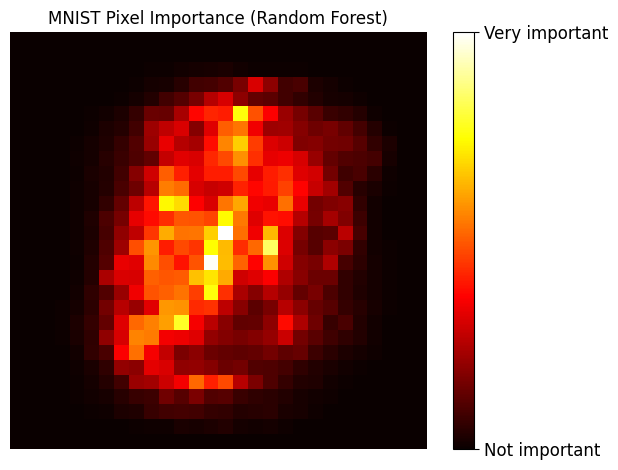

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl

# Ambil dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist, y_mnist = mnist.data, mnist.target.astype(np.uint8)

# Latih Random Forest
rf_mnist = RandomForestClassifier(n_estimators=100, random_state=42)
rf_mnist.fit(X_mnist, y_mnist)

# Fungsi plot pixel importance
def plot_digit(data):
    plt.imshow(data.reshape(28, 28), cmap=mpl.cm.hot, interpolation="nearest")
    plt.axis("off")

# Visualisasi feature importance sebagai gambar
plot_digit(rf_mnist.feature_importances_)
cbar = plt.colorbar(ticks=[rf_mnist.feature_importances_.min(), rf_mnist.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.title("MNIST Pixel Importance (Random Forest)")
plt.tight_layout()
plt.show()

# **Boosting**
## AdaBoost
Setup: Plot Decision Boundary

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Fungsi visualisasi decision boundary
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=1.0, contour=True):
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_grid).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=alpha)
    if contour:
        plt.contour(x1, x2, y_pred, cmap=custom_cmap, linewidths=0.5)
    plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], "yo", alpha=0.6)
    plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], "bs", alpha=0.6)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

AdaBoost Classifier with Decision Stumps

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


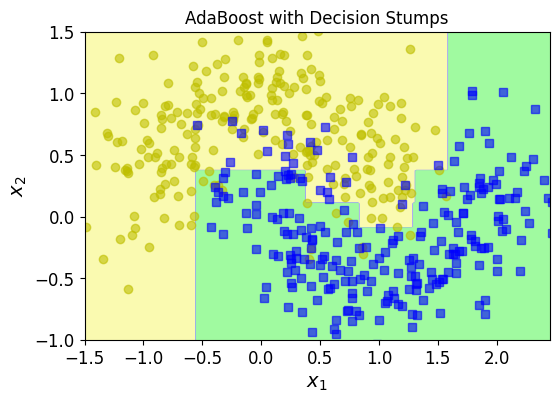

In [9]:
# Adaboost dengan Decision Stump (depth=1)
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200, algorithm="SAMME",
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

# Visualisasi boundary Adaboost
plt.figure(figsize=(6, 4))
plot_decision_boundary(ada_clf, X, y)
plt.title("AdaBoost with Decision Stumps")
plt.show()

Simulasi Boosting Manual dengan SVM

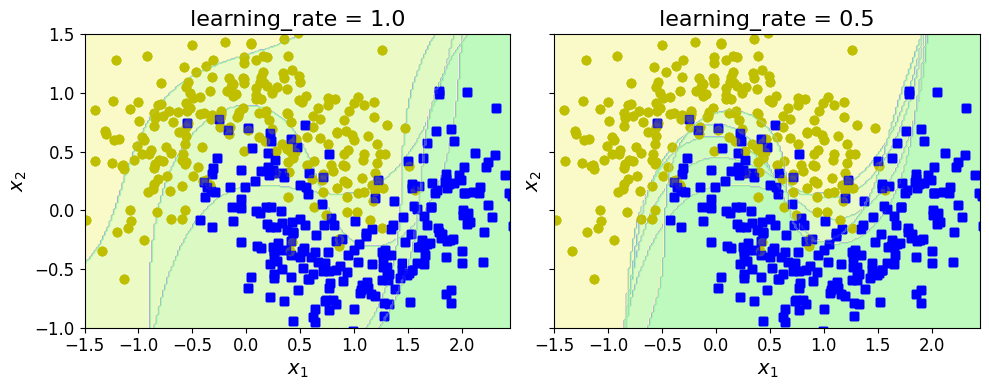

In [10]:
m = len(X_train)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

for subplot, lr in ((0, 1.0), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])

    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        # Hitung error dan alpha
        err = sample_weights[y_pred != y_train].sum()
        alpha = lr * np.log((1 - err) / err)
        sample_weights[y_pred != y_train] *= np.exp(alpha)
        sample_weights /= sample_weights.sum()

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)

    axes[subplot].set_title(f"learning_rate = {lr}", fontsize=16)

plt.tight_layout()
plt.show()

Gradient Boosting

Prediksi untuk x = 0.8: 0.7503


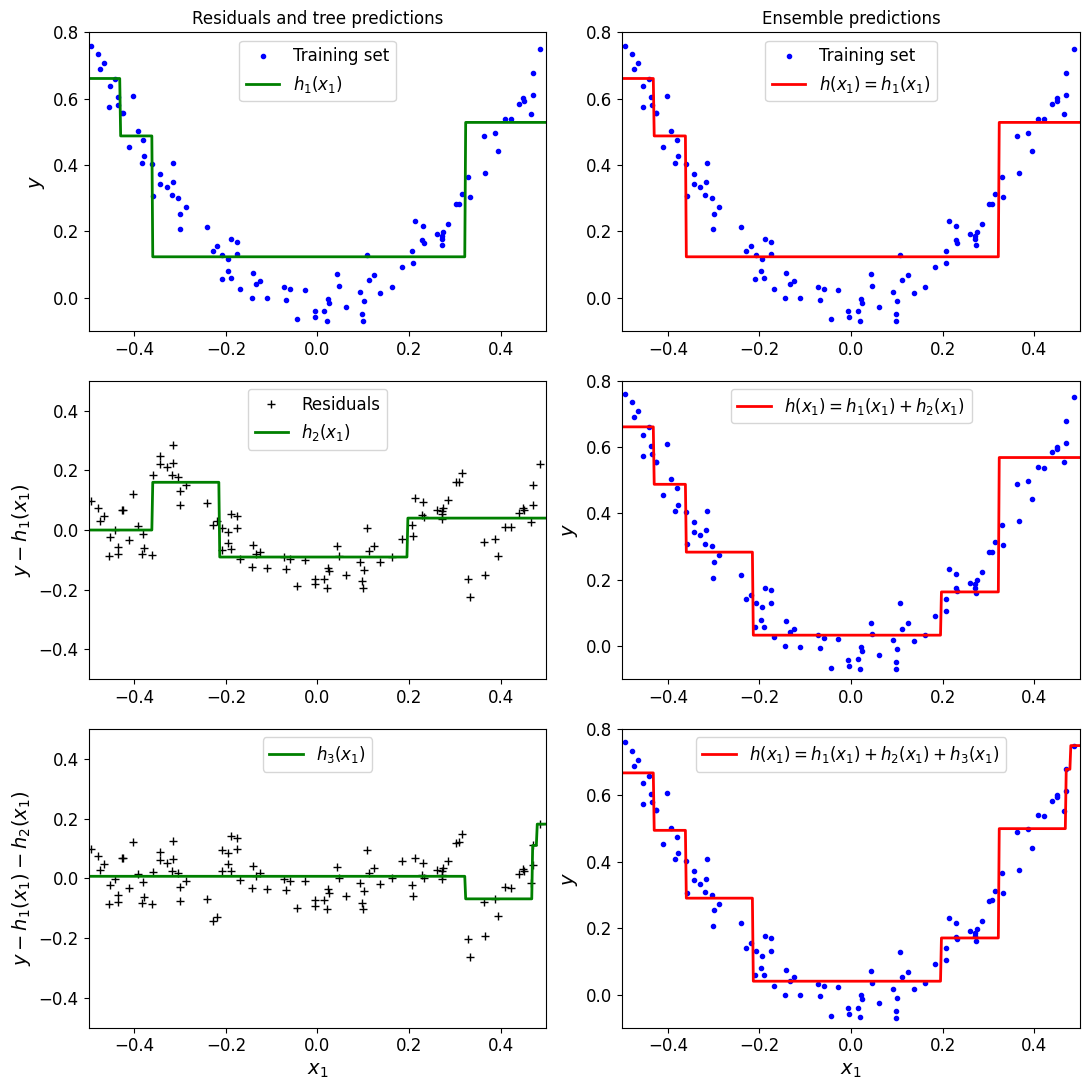

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Seed dan data kuadratik
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

# 3 Pohon untuk boosting
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

# Prediksi untuk input baru X_new
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(f"Prediksi untuk x = 0.8: {y_pred[0]:.4f}")

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(tree.predict(x1.reshape(-1, 1)) for tree in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=12)
    plt.axis(axes)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Visualisasi proses boosting
plt.figure(figsize=(11, 11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8],
                 label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.title("Residuals and tree predictions")
plt.ylabel("$y$", fontsize=14)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8],
                 label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.title("Ensemble predictions")

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5],
                 label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=14)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8],
                 label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=14)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5],
                 label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=14)
plt.xlabel("$x_1$", fontsize=14)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-0.5, 0.5, -0.1, 0.8],
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)

save_fig("gradient_boosting_plot")
plt.show()

## Gradient Boosting with Early stopping

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

# Model awal
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

# Hitung error validasi tiap iterasi
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
min_error = np.min(errors)

# Model terbaik dengan jumlah pohon optimal
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(56),
                          random_state=42)

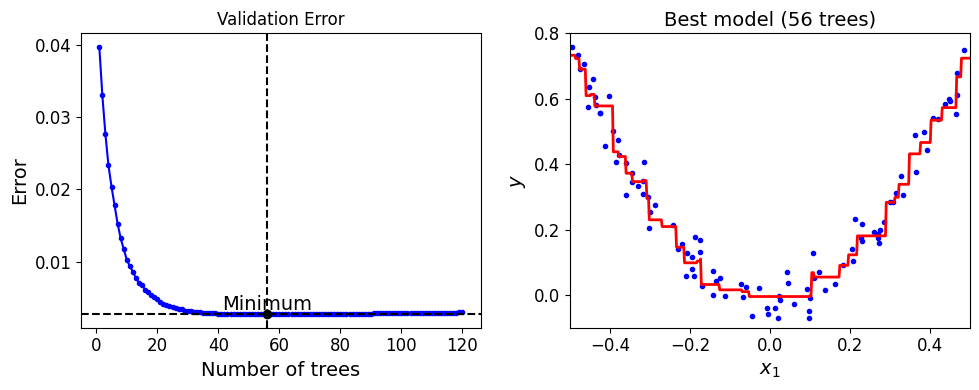

In [13]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(model.predict(x1.reshape(-1, 1)) for model in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=12)
    plt.axis(axes)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Plot error dan prediksi
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.axvline(bst_n_estimators, linestyle="--", color="k")
plt.axhline(min_error, linestyle="--", color="k")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error * 1.2, "Minimum", ha="center", fontsize=14)
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=14)
plt.title("Validation Error")

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title(f"Best model ({bst_n_estimators} trees)", fontsize=14)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)

save_fig("early_stopping_gbrt_plot")
plt.show()

In [14]:
# Inisialisasi model dengan warm_start
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0

# Proses early stopping manual
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)

    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # Stop saat error naik 5 kali berturut-turut

print(f"Early stopping at {gbrt.n_estimators} trees")
print(f"Minimum validation MSE: {min_val_error:.5f}")

Early stopping at 61 trees
Minimum validation MSE: 0.00271


## XGBoost

In [19]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Siapkan DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Parameter boosting
params = {
    "objective": "reg:squarederror",
    "max_depth": 2,
    "learning_rate": 0.1,
    "seed": 42
}

# Watchlist untuk evaluasi selama training
watchlist = [(dtrain, "train"), (dval, "eval")]

# Training dengan early stopping
model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=200,
                  evals=watchlist,
                  early_stopping_rounds=5,
                  verbose_eval=False)

# Prediksi dan evaluasi
y_pred = model.predict(dval)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE (XGBoost with train+early stopping):", round(val_error, 5))

Validation MSE (XGBoost with train+early stopping): 0.00359


In [21]:
# Import modul terlebih dahulu
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Asumsikan X_train dan y_train sudah tersedia

# Waktu pelatihan XGBoost
print("⏱ Waktu training XGBoost:")
%timeit XGBRegressor().fit(X_train, y_train)

# Waktu pelatihan GradientBoostingRegressor
print("⏱ Waktu training GradientBoostingRegressor (Scikit-Learn):")
%timeit GradientBoostingRegressor().fit(X_train, y_train)

⏱ Waktu training XGBoost:
The slowest run took 14.11 times longer than the fastest. This could mean that an intermediate result is being cached.
126 ms ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
⏱ Waktu training GradientBoostingRegressor (Scikit-Learn):
76.3 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# **Proses Gradient Boosting dan XGBoost**

## Penjelasan Singkat
Gradient Boosting Manual (Scikit-learn)

* Menggunakan GradientBoostingRegressor.

* Validasi dilakukan menggunakan staged_predict untuk memantau Mean Squared Error (MSE) pada setiap jumlah pohon.

* Jumlah pohon terbaik dipilih berdasarkan nilai MSE terendah

Early Stopping Manual dengan warm_start

* Model dilatih secara bertahap dengan menambahkan pohon satu per satu (warm_start=True).

* Proses pelatihan dihentikan ketika MSE pada data validasi meningkat selama 5 iterasi berturut-turut.

* Teknik ini efektif untuk menemukan jumlah estimator optimal secara otomatis.

XGBoost

* Pelatihan model dilakukan menggunakan XGBRegressor dan xgboost.train dengan format DMatrix.

* Mendukung early stopping secara langsung melalui parameter early_stopping_rounds.

* MSE pada data validasi umumnya lebih rendah dibandingkan dengan GradientBoostingRegressor.

## Perbandingan Waktu Pelatihan

| Model                         | Rata-rata Waktu per Loop |
| ----------------------------- | ------------------------ |
| **XGBoost**                   | 68.7 ms ± 25 ms          |
| **GradientBoostingRegressor** | 83.7 ms ± 16.5 ms        |

XGBoost sedikit lebih cepat, meskipun terdapat variasi performa antar loop.


## Kesimpulan
XGBoost unggul dalam:

* Akurasi (MSE lebih rendah)

* Kecepatan pelatihan

* Dukungan fitur tambahan seperti:

    * early_stopping

    * Logging

    * Format input efisien (DMatrix)

GradientBoostingRegressor tetap berguna untuk:

* Integrasi yang mudah dalam pipeline Scikit-learn

* Pembelajaran konsep dasar Boosting

* Eksperimen awal yang lebih sederhana dan intuitif